In [1]:
"""Anurag's note for multi class image classification""" 

"Anurag's note for multi class image classification"

In [2]:
#checking whats in what directory
import os
print(os.listdir())

['.ipynb_checkpoints', 'Anurag_Submission.ipynb', 'jpg', 'test.txt', 'train.txt', 'Trained_model.h5', 'valid.txt']


In [3]:
#parsing our txt files and making labels and path list out of it
images_path=[]

images_class=[]
with open("test.txt","r") as f:
#     for i in f:
#         print(f.readlines()[0:5])

    for j in f.readlines():
        j=j.split()
        images_path.append(j[0])
        images_class.append(j[1])
        
print(len(images_path))
print(len(images_class))

6149
6149


In [4]:
#checking how many unique labels are there and creating it
labels=[]
temp=set(images_class)
temp=list(map(int,temp))
temp.sort()
for i in temp:
    labels.append(str(i))

print("Unique classes:- ",labels,len(labels))

Unique classes:-  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101'] 102


In [5]:
#headers for out nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [6]:
#creating test data
X_train_data=images_path
Y_train_data=images_class

X_test_data=[]
Y_test_data=[]


with open("train.txt","r") as f:    
    for j in f.readlines():
        j=j.split()
        X_test_data.append(j[0])
        Y_test_data.append(j[1])



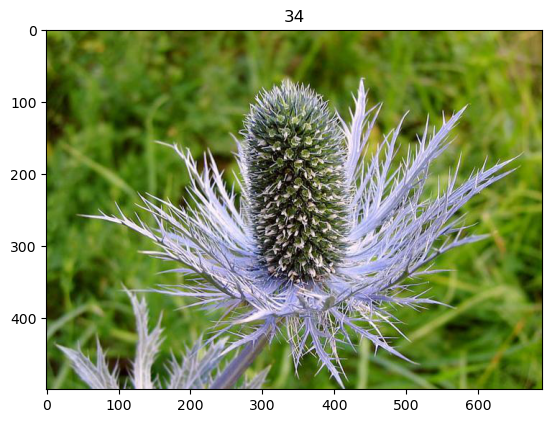

In [7]:
#checking how is our image looks like
image1 = mpimg.imread(X_train_data[0]) # images are color images
plt.title(Y_train_data[0])
plt.imshow(image1)
plt.show()



In [8]:
X_train=[]
Y_train=Y_train_data

X_test=[]
Y_test=Y_test_data

for i in X_train_data:
    img = image.load_img(i, target_size=(32,32,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
#     print(img)
    X_train.append(img)
for j in X_test_data:
    img = image.load_img(j, target_size=(32,32,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
#     print(img)
    X_test.append(img)
    
    
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
print(Y_train)
Y_train = to_categorical(Y_train)
print(Y_train)
Y_test= to_categorical(Y_test)


['34' '80' '58' ... '89' '75' '76']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
print(len(Y_train))

6149


In [10]:
#nn implementation and creation of model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(102, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test))

Train on 6149 samples, validate on 1020 samples
Epoch 1/200
6149/6149 [==============================] - 10s 2ms/sample - loss: 4.4934 - accuracy: 0.0395 - val_loss: 4.6557 - val_accuracy: 0.0186
Epoch 2/200
6149/6149 [==============================] - 3s 455us/sample - loss: 4.3082 - accuracy: 0.0673 - val_loss: 4.5308 - val_accuracy: 0.0284
Epoch 3/200
6149/6149 [==============================] - 3s 436us/sample - loss: 4.1115 - accuracy: 0.0878 - val_loss: 4.4093 - val_accuracy: 0.0402
Epoch 4/200
6149/6149 [==============================] - 3s 484us/sample - loss: 3.9284 - accuracy: 0.1129 - val_loss: 4.2443 - val_accuracy: 0.0441
Epoch 5/200
6149/6149 [==============================] - 3s 451us/sample - loss: 3.7526 - accuracy: 0.1298 - val_loss: 4.0818 - val_accuracy: 0.0706
Epoch 6/200
6149/6149 [==============================] - 3s 436us/sample - loss: 3.5872 - accuracy: 0.1545 - val_loss: 3.9580 - val_accuracy: 0.0794
Epoch 7/200
6149/6149 [==============================] - 3s

In [11]:
#saving it for future
import h5py
model.save('Trained_model.h5')

In [12]:
#validating it by creating confusion matrix
orignal_compare=[]
predicted_class_for_valid=[]
valid_path=[]

with open("valid.txt","r") as f:
    for z in f.readlines():
        z=z.split()
        valid_path.append(z[0])
        orignal_compare.append(z[1])
        
validated_data=[]

for i in valid_path:
    img = image.load_img(i, target_size=(32,32,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255

    validated_data.append(img)
    
validated_data=np.array(validated_data)




In [13]:
prediction = model.predict_classes(validated_data)

In [14]:
labels=list(labels)
print(labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101']


In [15]:
from sklearn import metrics
prediction=prediction.tolist()
# print(prediction)
hello=[]
for i in prediction:
    hello.append(str(i))
# print(orignal_compare)
print(metrics.confusion_matrix(orignal_compare, hello, labels=['0', '1', '10', '100', '101', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99','100','101']))

[[0 1 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [20]:
""" confusion matrix between orignal_compare and predicted_class_for_valid """
print(metrics.classification_report(hello, orignal_compare, labels=['0', '1', '10', '100', '101', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99','100','101']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      0.75      0.82        12
          10       0.10      0.20      0.13         5
         100       0.00      0.00      0.00         3
         101       0.10      0.25      0.14         4
          11       0.60      0.33      0.43        18
          12       0.60      0.86      0.71         7
          13       0.70      0.58      0.64        12
          14       0.40      0.57      0.47         7
          15       0.10      1.00      0.18         1
          16       0.70      0.78      0.74         9
          17       0.30      0.38      0.33         8
          18       0.10      0.20      0.13         5
          19       0.50      0.56      0.53         9
           2       0.00      0.00      0.00         1
          20       0.70      0.78      0.74         9
          21       0.10      0.20      0.13         5
          22       0.30    

C:\Users\Anurag\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anurag\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anurag\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
